# Analyzing Pond CO2 Emissions

In [1]:
#!pip install pandas --user

## Importing Packages

In [2]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 
from sklearn import preprocessing 
from statsmodels.stats.anova import anova_lm

## Reading Data

In [3]:
# imported data
# df = pd.read_csv('TotalData.csv') 
# df = pd.read_csv('Pond1Data.csv') 
# df = pd.read_csv('Pond2Data.csv') 
# df = pd.read_csv('Pond3Data.csv') 
df = pd.read_csv('Pond4Data.csv') 
df.rename(columns={'CO2(ppm)': 'CO2_ppm'}, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

In [4]:
# check first 5 rows of data
df.head()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY,TEMPUNIT,SENSOR,Unnamed: 9
0,2025-04-10 17:07:00,2.4,4.1,407,406,30.3,73.5,C,YELLOW,POND 4
1,2025-04-10 17:17:00,2.6,4.3,408,407,29.2,76.4,C,YELLOW,NaN
2,2025-04-10 17:27:00,2.7,4.2,451,408,28.7,79.0,C,YELLOW,NaN
3,2025-04-10 17:37:00,2.5,4.2,473,409,28.4,79.6,C,YELLOW,NaN
4,2025-04-10 17:47:00,3.1,4.8,475,411,28.2,80.6,C,YELLOW,NaN


In [5]:
# check shape of data
df.shape

(254, 10)

In [6]:
# check for nulls
df.isnull().sum()

DATE                  0
PM2.5(ug/m3)          0
PM10(ug/m3)           0
PARTICLES(per/L)      0
CO2_ppm               0
TEMPERATURE           0
HUMIDITY              0
TEMPUNIT              0
SENSOR                0
Unnamed: 9          253
dtype: int64

In [7]:
# check data types
df.dtypes

DATE                datetime64[ns]
PM2.5(ug/m3)               float64
PM10(ug/m3)                float64
PARTICLES(per/L)             int64
CO2_ppm                      int64
TEMPERATURE                float64
HUMIDITY                   float64
TEMPUNIT                    object
SENSOR                      object
Unnamed: 9                  object
dtype: object

In [8]:
# get column names
df.columns

Index(['DATE', 'PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'CO2_ppm',
       'TEMPERATURE', 'HUMIDITY', 'TEMPUNIT', 'SENSOR', 'Unnamed: 9'],
      dtype='object')

In [9]:
# get basic stats
df.describe()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
count,254,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,2025-04-11 14:23:17.007874048,5.851969,9.530315,930.791339,537.996063,23.451575,91.650394
min,2025-04-10 17:07:00,2.200000,3.500000,343.000000,406.000000,16.600000,55.400000
25%,2025-04-11 03:48:30,3.900000,6.500000,639.250000,482.250000,18.600000,85.175000
50%,2025-04-11 14:21:00,5.400000,8.900000,858.500000,526.500000,21.500000,97.350000
75%,2025-04-12 01:03:30,7.575000,12.375000,1180.250000,618.750000,27.900000,99.900000
max,2025-04-12 11:36:00,16.000000,26.500000,2387.000000,687.000000,38.800000,99.900000
std,NaN,2.486035,4.021630,372.728525,80.231656,5.386198,10.780046


## Linear Regression

In [10]:
# create new data frame for analysis
dfA = df.drop(columns=['DATE', 'TEMPUNIT', 'SENSOR', 'Unnamed: 9'])

In [11]:
# check first 5 rows
dfA.head()

,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
0,2.4,4.1,407,406,30.3,73.5
1,2.6,4.3,408,407,29.2,76.4
2,2.7,4.2,451,408,28.7,79.0
3,2.5,4.2,473,409,28.4,79.6
4,3.1,4.8,475,411,28.2,80.6


In [12]:
# check new shape
dfA.shape

(254, 6)

In [13]:
# check for nulls
dfA.isnull().sum()

PM2.5(ug/m3)        0
PM10(ug/m3)         0
PARTICLES(per/L)    0
CO2_ppm             0
TEMPERATURE         0
HUMIDITY            0
dtype: int64

In [14]:
# select target value (y) and independent variables (x)
y = df['CO2_ppm']
x = df[['TEMPERATURE', 'HUMIDITY']]

In [15]:
# divide data for training/testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [16]:
# check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((203, 2), (51, 2), (203,), (51,))

In [17]:
# check selected 5 rows of IVs
x_train.head()

,TEMPERATURE,HUMIDITY
17,24.1,92.6
184,20.3,98.3
138,28.9,88.2
178,20.8,99.6
196,18.8,99.5


In [18]:
# check same selected rows of target
y_train.head()

17     410
184    656
138    494
178    657
196    653
Name: CO2_ppm, dtype: int64

In [19]:
# perform linear regression
model = LinearRegression()

In [20]:
# fit x and y values together
model.fit(x_train,y_train)

LinearRegression()

In [21]:
# y-intercept
model.intercept_

np.float64(1311.493367500986)

In [22]:
# model coefficients (aka beta values) - written as [temperature, humidity]
model.coef_

array([-16.59773578,  -4.1998672 ])

In [23]:
# model is used to predict y_test data
y_pred = model.predict(x_test)

In [24]:
# predictions are listed
y_pred

array([611.42489976, 614.74444692, 526.45732709, 508.60328376,
       517.32213837, 584.86852252, 588.18806968, 578.22942821,
       471.62793173, 457.8361951 , 506.12736266, 609.76512619,
       464.23320979, 591.50761683, 578.22942821, 584.86852252,
       579.88920179, 581.54897537, 579.88920179, 469.16853131,
       586.5282961 , 506.11084197, 578.22942821, 535.07531519,
       533.45588821, 552.95318443, 465.03283663, 583.20874894,
       463.42993035, 484.54665353, 468.8090645 , 502.35113479,
       581.54897537, 563.29146601, 533.41554161, 525.88691179,
       553.13474414, 499.89173438, 601.4662583 , 588.18806968,
       471.65175764, 578.22942821, 545.03395665, 579.88920179,
       470.7916109 , 574.90988105, 589.84784325, 520.08779092,
       509.72568342, 588.18806968, 566.59449248])

In [25]:
# variance between y_test and y_pred values are averaged
mean_absolute_error(y_test, y_pred)

43.0791005585798

In [26]:
# average percentage of variance from actual value. Meaning, (actual - predicted)/actual
mean_absolute_percentage_error(y_test, y_pred)

0.08451744537407709

In [27]:
# another error test, but all numbers are squared so larger variance has a more significant impact.
mean_squared_error(y_test, y_pred)

2867.303642875857

In [28]:
#R squared explains what percentage of the variance can be explained by the IVs. In this case, IVs only explain 49.76% of variance in data
model.score(x_test, y_test)

0.4976149539336734

In [29]:
# This cell determines which IV contributes more to accurate predictions. 2 Models are made using only one IV, and they are fitted to the actual values. Whichever model is more accurate is more 
# Model with Temperature only
X_temp = df[['TEMPERATURE']]
X_temp = sm.add_constant(X_temp)
model_temp = sm.OLS(y, X_temp).fit()

# Model with humidity only
X_hum = df[['HUMIDITY']]
X_hum = sm.add_constant(X_hum)
model_hum = sm.OLS(y, X_hum).fit()

# Full model with Temperature + Humidity
X_full = df[['TEMPERATURE', 'HUMIDITY']]
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full).fit()

# Compare models using F-test
f_test = anova_lm(model_temp, model_hum, model_full)
print(f_test)

# output explanation:
# df_resid - degrees of freedom for residual, number of observations minus number of parameters.
# ssr - sum of squared residuals, measures total unexplained variability.
# df_diff - change in degrees of freedom, difference in df_resid between the two models.
# ss_diff - change in sum of squared residuals, difference in ssr between the two models.
# F - F-statistic, compares how much adding humidity improves the model.
# Pr(>F) - P-value for the F-test, determines probability that any improvements made by adding the second IV are due to chance. Here 0.79 indicates that there is no significant improvement.

   df_resid           ssr  df_diff        ss_diff          F        Pr(>F)
0     252.0  1.045516e+06      0.0            NaN        NaN           NaN
1     252.0  1.241394e+06     -0.0 -195877.899071        inf           NaN
2     251.0  9.745912e+05      1.0  266802.313419  68.713302  6.935112e-15


In [30]:
# revise
results = smf.ols('CO2_ppm ~ TEMPERATURE + HUMIDITY', data=dfA).fit()
print(results.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     84.22
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.03e-28
Time:                        22:38:56   Log-Likelihood:                -1408.5
No. Observations:                 254   AIC:                             2823.
Df Residuals:                     251   BIC:                             2834.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1349.3811    142.022      9.501      

In [31]:
resultsH = smf.ols('CO2_ppm ~ HUMIDITY', data=dfA).fit()
print(resultsH.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     78.60
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.42e-16
Time:                        22:38:56   Log-Likelihood:                -1439.2
No. Observations:                 254   AIC:                             2882.
Df Residuals:                     252   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    205.3980     37.773      5.438      0.0

In [32]:
resultsT = smf.ols('CO2_ppm ~ TEMPERATURE', data=dfA).fit()
print(resultsT.summary())

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     140.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           4.66e-26
Time:                        22:38:56   Log-Likelihood:                -1417.4
No. Observations:                 254   AIC:                             2839.
Df Residuals:                     252   BIC:                             2846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     747.0180     18.089     41.297      

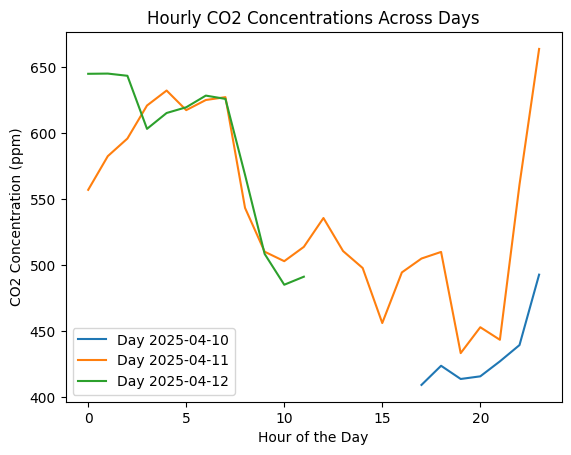

In [33]:
# create new data frame for graphing
dfG = df.drop(columns=['PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'TEMPERATURE', 'HUMIDITY', 'TEMPUNIT', 'SENSOR', 'Unnamed: 9'])
# format DATE column
dfG['DATE'] = pd.to_datetime(dfG['DATE'])
# Extract the date (e.g., 01/01/2025)
df['DAY'] = df['DATE'].dt.date  
# Extract the hour (0, 1, ..., 23)
df['HOUR'] = df['DATE'].dt.hour  
# Create a pivot table where rows are days and columns are hours
co2_pivot = df.pivot_table(index='DAY', columns='HOUR', values='CO2_ppm', aggfunc='mean')

# Plot CO2 concentration for each day
for day, co2_values in co2_pivot.iterrows():
    co2_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Hourly CO2 Concentrations Across Days")
plt.legend(loc="best")
plt.show()

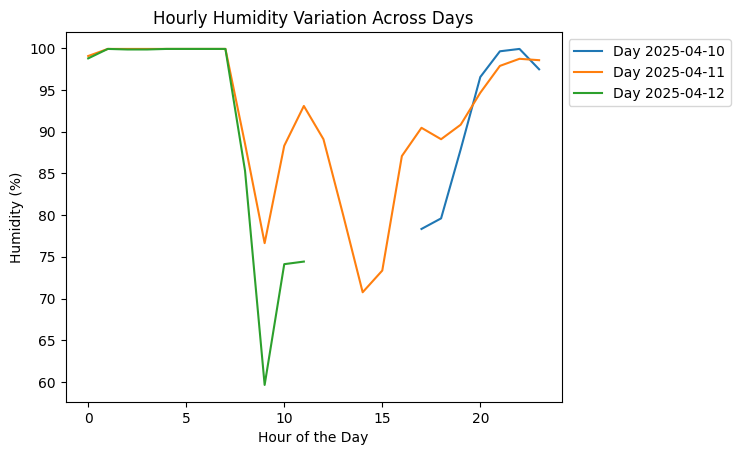

In [34]:
# Create a pivot table for Humidity
humidity_pivot = df.pivot_table(index='DAY', columns='HOUR', values='HUMIDITY', aggfunc='mean')

# Plot Humidity for each day
for day, humidity_values in humidity_pivot.iterrows():
    humidity_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Humidity (%)")
plt.title("Hourly Humidity Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

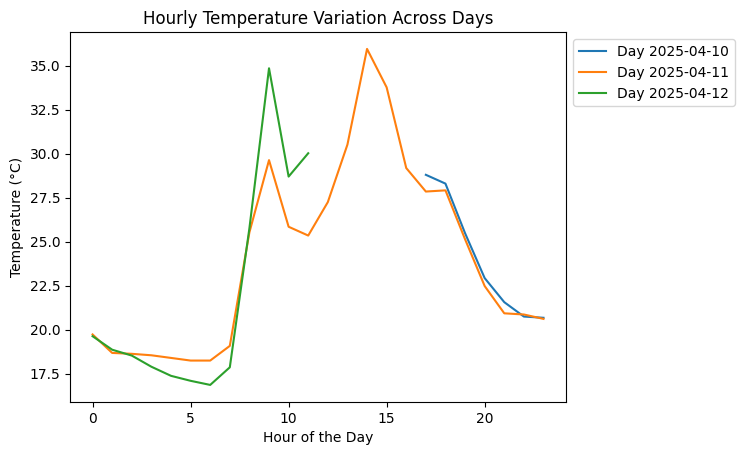

In [35]:
# Create a pivot table for Temperature
temperature_pivot = df.pivot_table(index='DAY', columns='HOUR', values='TEMPERATURE', aggfunc='mean')

# Plot Temperature for each day
for day, temperature_values in temperature_pivot.iterrows():
    temperature_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (°C)")
plt.title("Hourly Temperature Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

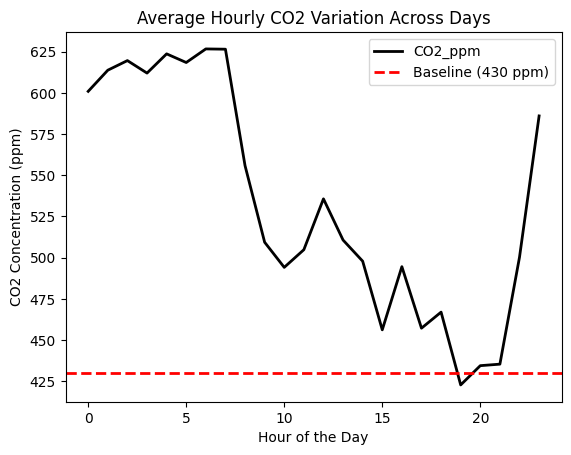

In [36]:
import matplotlib.pyplot as plt

# Compute the average CO2 concentration per hour
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')

# Plot the averaged CO2 data
avg_co2_per_hour.plot(label="Average CO2 Variation", color='black', linewidth=2)

# Add baseline at 430 ppm
plt.axhline(y=430, color='red', linestyle='dashed', linewidth=2, label="Baseline (430 ppm)")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Average Hourly CO2 Variation Across Days")
plt.legend(loc="best")

# Show the plot
plt.show()

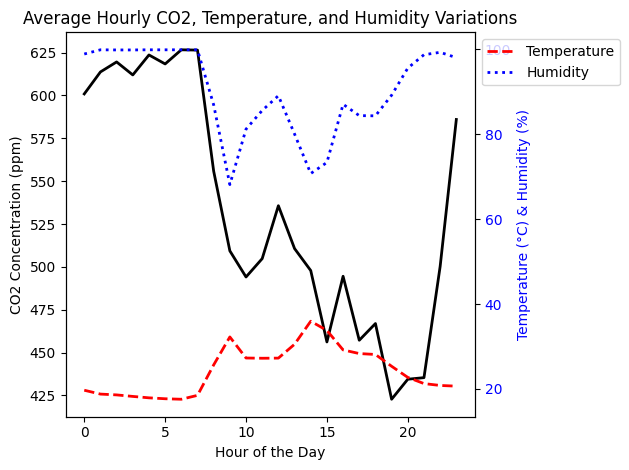

In [37]:
# Compute the average value per hour across all days for each variable
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')
avg_temp_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='TEMPERATURE', aggfunc='mean')
avg_humidity_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='HUMIDITY', aggfunc='mean')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot CO2 concentration
ax1.plot(avg_co2_per_hour, label="CO2 Concentration", color='black', linewidth=2)
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("CO2 Concentration (ppm)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create secondary y-axis for Temperature and Humidity
ax2 = ax1.twinx()
ax2.plot(avg_temp_per_hour, label="Temperature", color='red', linestyle="dashed", linewidth=2)
ax2.plot(avg_humidity_per_hour, label="Humidity", color='blue', linestyle="dotted", linewidth=2)
ax2.set_ylabel("Temperature (°C) & Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legend entries from both axes
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add title and layout adjustments
plt.title("Average Hourly CO2, Temperature, and Humidity Variations")
plt.tight_layout()  # Adjusts layout to fit legend and labels properly

# Show the plot
plt.show()